# Predict Fuel Efficiency

In [3]:
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(precision = 3, suppress = True)

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin"]

dataset = pd.read_csv(url, names = column_names, na_values = "?", comment = "\t", sep = " ", skipinitialspace = True)

In [6]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [7]:
dataset


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [8]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## Cleaning the Data

In [9]:
dataset.isnull().any().any()

True

In [10]:
null_counts = dataset.isnull().sum()
null_counts

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [11]:
dataset["Horsepower"].fillna(dataset["Horsepower"].mean(), inplace = True)

In [12]:
null_total = dataset.isnull().sum()
null_total

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [13]:
dataset.Origin.unique()

array([1, 3, 2])

## One Hot Encoding to convert the categorical "Origin" data into one-hot data

In [14]:
origin = dataset.pop("Origin")
dataset["USA"] = (origin == 1) *1
dataset["Europe"] = (origin == 2) * 1
dataset["Japan"] = (origin == 3) *1

In [15]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0


## Splitting Data into Train and Test

In [16]:
train_dataset = dataset.sample(frac = 0.8, random_state = 0)
test_dataset = dataset.drop(train_dataset.index)
print(dataset.shape,train_dataset.shape, test_dataset.shape)

(398, 10) (318, 10) (80, 10)


In [17]:
train_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,23.590566,5.427673,193.061321,104.073418,2963.823899,15.595912,75.946541,0.641509,0.163522,0.194969
std,7.913617,1.682941,103.812742,38.368477,844.749805,2.796282,3.705266,0.480313,0.370424,0.396801
min,10.000000,3.000000,70.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.125000,4.000000,100.250000,75.250000,2219.250000,13.900000,73.000000,0.000000,0.000000,0.000000
50%,22.750000,4.000000,151.000000,92.000000,2792.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,6.000000,259.500000,120.000000,3571.250000,17.300000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


### Splitting Labels and Features

In [18]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop("MPG")
test_labels = test_features.pop("MPG")

In [19]:
def plot(feature, a = None, b = None):
    plt.figure(figsize = (3,3))
    plt.scatter(train_features[feature], train_labels, label = 'Data', color = "r")
    if a is not None and b is not None:
        plt.plot(a, b, color = "k", label = "Predictions")
    plt.xlabel(feature)
    plt.ylabel("MPG")
    plt.legend()
    


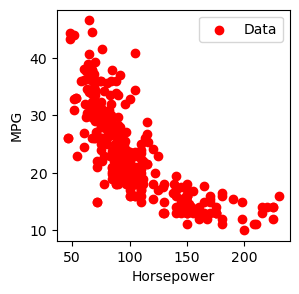

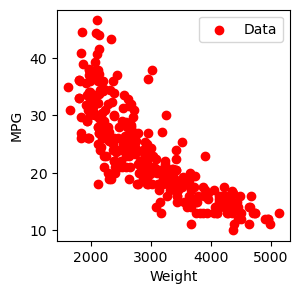

In [20]:
plot("Horsepower")
plot("Weight")

### Normalization

In [21]:
print(train_dataset.describe().transpose()[["mean", "std"]])


                     mean         std
MPG             23.590566    7.913617
Cylinders        5.427673    1.682941
Displacement   193.061321  103.812742
Horsepower     104.073418   38.368477
Weight        2963.823899  844.749805
Acceleration    15.595912    2.796282
Model Year      75.946541    3.705266
USA              0.641509    0.480313
Europe           0.163522    0.370424
Japan            0.194969    0.396801


In [22]:
train_stats = train_dataset.describe().transpose()

In [23]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_dataset = norm(train_dataset)
normed_test_dataset = norm(test_dataset)

## Deep Neural Network for the single feature prediction

In [25]:
dnn_model = keras.Sequential([
    layers.Dense(64, activation='relu',input_shape=(train_dataset.shape[1],)),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1)
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
loss = keras.losses.MeanSquaredError()
optim = keras.optimizers.Adam(0.01)
dnn_model.compile(loss = loss, optimizer = optim)

dnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,929 (19.25 KB)

 Trainable params: 4,929 (19.25 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
dnn_model.fit(
    normed_train_dataset, train_labels, validation_split = 0.2, verbose = 1, epochs = 100
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 544.3135 - val_loss: 289.2985
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 177.0027 - val_loss: 87.6739
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 77.8613 - val_loss: 20.3371
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.3812 - val_loss: 24.2856
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.5015 - val_loss: 12.6250
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.1865 - val_loss: 8.0955
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3847 - val_loss: 6.4391
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7468 - val_loss: 5.8954
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5781 - val_loss: 4.2373
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0757 - val_loss: 3.8230
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2981 - val_loss: 3.4958
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7639 - val_

## Model Evaluation

In [30]:
test_pred = dnn_model.predict(normed_test_dataset)
mse = mean_squared_error(test_labels, test_pred)
mae = mean_absolute_error(test_labels, test_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Mean Squared Error (MSE): 0.07
Mean Absolute Error (MAE): 0.13


## Make the predictions

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step


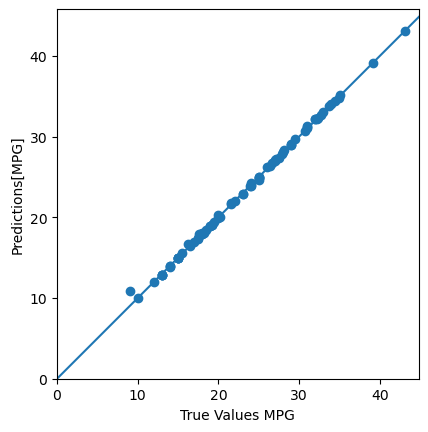

In [37]:
test_predictions = dnn_model.predict(normed_test_dataset).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel("True Values MPG")
plt.ylabel("Predictions[MPG]")
plt.axis("equal")
plt.axis("square")
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

## Hence, we have developed the deep neural network for the regression problem to predict the miles per gallon given different inputs such as horsepower, number of cylinders, weight, acceleration, model year, displacement, and origin place of that vehicle.